# Classification

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale,StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn import linear_model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from matplotlib.legend_handler import HandlerLine2D



np.random.seed(54)


In [2]:
df = pd.read_csv('Data/df_min_post_clustering.csv')
df = df.set_index('date').drop('Unnamed: 0',axis = 1)
subset_columns = ['percent_change','open','close',
                  'volume','n_trades',
                  'compound_avg','nTweets','nlikes','nreplies','nretweets','k_means_clusters','hier_clusters','db_clusters']


In [3]:
def prep_data(df,subset_cols,target_col,model):
    
    buy = False
    sell = True
    df_subset = df[subset_cols]
    df_subset['response'] = np.where(df_subset.copy()[target_col] > 0,sell,buy) 
    print(df_subset['response'].value_counts())
    
    x_col = df_subset.columns[1:-4]
    y_col = df_subset.columns[-1:]
    X = df_subset[x_col]
    y = np.array(df_subset['response'])
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3) 
    
    
    if model == 'logistic':
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    if model == 'knn':
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    


    return X_train, X_test, y_train, y_test,y,X, df_subset

## kNN

In [4]:
X_train, X_test, y_train, y_test,y,X,df_subset = prep_data(df,subset_columns,'percent_change','knn')

False    7218
True     5742
Name: response, dtype: int64


/var/folders/bx/98s7l1y96p1f_2n55v3g_3dc0000gn/T/ipykernel_29433/2953734480.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['response'] = np.where(df_subset.copy()[target_col] > 0,sell,buy)


In [5]:
np.unique(y_test, return_counts=True)

(array([False,  True]), array([2144, 1744]))

In [6]:
kNN_dict = {}
for x in range(1,101):
    kNN = KNeighborsClassifier(n_neighbors = x)
    # Fit the classifier to the data.
    kNN.fit(X_train, y_train)
    predictions = kNN.predict(X_test)
    #actual_v_predicted = np.column_stack((y_test, predictions))
    cm_kNN = confusion_matrix(y_test, predictions)
    #print(cm_kNN)
    print(x,round(accuracy_score(y_test, predictions), 4))
    kNN_dict[x] = round(accuracy_score(y_test, predictions), 4)

1 0.517
2 0.528
3 0.5118
4 0.5231
5 0.5069
6 0.5213
7 0.5139
8 0.527
9 0.5154
10 0.5306
11 0.5203
12 0.5329
13 0.5224
14 0.5316
15 0.5244
16 0.5301
17 0.5306
18 0.534
19 0.5283
20 0.5316
21 0.5345
22 0.5327
23 0.536
24 0.5345
25 0.5334
26 0.5332
27 0.535
28 0.5352
29 0.5309
30 0.5363
31 0.5342
32 0.5419
33 0.534
34 0.5401
35 0.5324
36 0.546
37 0.5396
38 0.5422
39 0.5347
40 0.5373
41 0.5332
42 0.5324
43 0.5311
44 0.5363
45 0.5314
46 0.5373
47 0.537
48 0.536
49 0.5311
50 0.5327
51 0.5324
52 0.534
53 0.5306
54 0.5334
55 0.5278
56 0.5314
57 0.5329
58 0.5363
59 0.5365
60 0.5365
61 0.5394
62 0.5396
63 0.5386
64 0.5365
65 0.5319
66 0.5334
67 0.5314
68 0.5334
69 0.5293
70 0.5334
71 0.528
72 0.5334
73 0.5316
74 0.5324
75 0.5322
76 0.5365
77 0.5319
78 0.536
79 0.5316
80 0.5358
81 0.5342
82 0.5399
83 0.5334
84 0.5406
85 0.5324
86 0.5381
87 0.5324
88 0.5355
89 0.5347
90 0.5412
91 0.5358
92 0.5419
93 0.5355
94 0.5409
95 0.5394
96 0.5406
97 0.5376
98 0.5414
99 0.5404
100 0.5424


In [7]:
max_key = max(kNN_dict, key = kNN_dict.get)
max_key

36

In [8]:
kNN = KNeighborsClassifier(n_neighbors = max_key)
# Fit the classifier to the data.
kNN.fit(X_train, y_train)
predictions = kNN.predict(X_test)
#actual_v_predicted = np.column_stack((y_test, predictions))
cm_kNN = confusion_matrix(y_test, predictions)
#print(cm_kNN)
print(max_key,round(accuracy_score(y_test, predictions), 4))
#kNN_dict[x] = round(accuracy_score(y_test, predictions), 4)

36 0.546


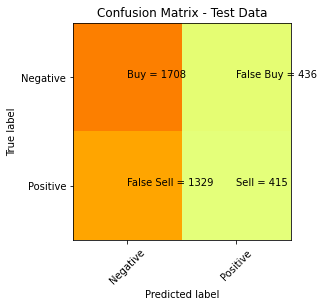

In [9]:
plt.imshow(cm_kNN, interpolation = 'nearest', cmap = plt.cm.Wistia)
#classNames = ['Buy', 'Sell']
classNames = ['Negative', 'Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation = 45)
plt.yticks(tick_marks, classNames)
#s = [['TN', 'FP'], ['FN', 'TP']]
s = [['Buy', 'False Buy'], ['False Sell', 'Sell']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm_kNN[i][j]))
plt.show()

In [10]:
# Create a dictionary with accuracy values for our kNN model with k.
model_final_dict = {'metrics': ["accuracy"],
                    'values':[round(accuracy_score(y_test, predictions), 4)],
                    'model':['kNN_k']}
model_final = pd.DataFrame(data = model_final_dict)
print(model_final)




    metrics  values  model
0  accuracy   0.546  kNN_k


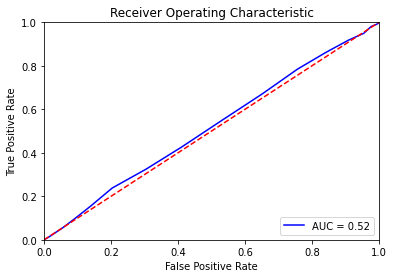

In [11]:
# Store FPR, TPR, and threshold as variables.
fpr, tpr, threshold = metrics.roc_curve(y_test, kNN.predict_proba(X_test)[:,1])
# Store the AUC.
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


In [12]:
cv_pipeline = Pipeline([('transformer',  StandardScaler()), ('estimator', kNN)])
cv_scores = cross_val_score(cv_pipeline, X, y, cv = 5)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
mean = np.mean(cv_scores)
print("Optimal cv score is:", round(mean, 4))

cv_scores mean:0.5314814814814816
Optimal cv score is: 0.5315


In [13]:
k_range = list(range(1, 21))
param_grid = dict(n_neighbors = k_range)
print(param_grid)
grid = GridSearchCV(kNN, param_grid, cv = 10, scoring = 'recall')
grid_search_pipeline = Pipeline([('transformer',  StandardScaler()), ('estimator', grid)])

# Fit Gridsearch pipeline
grid_search_pipeline.fit(X, y)





{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}


Pipeline(steps=[('transformer', StandardScaler()),
                ('estimator',
                 GridSearchCV(cv=10,
                              estimator=KNeighborsClassifier(n_neighbors=36),
                              param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19, 20]},
                              scoring='recall'))])

In [14]:
print(grid.cv_results_['mean_test_score'])


[0.43275928 0.19295137 0.39688623 0.22691683 0.38870626 0.2432898
 0.37651871 0.25722375 0.36537676 0.25704923 0.35841115 0.26209877
 0.34656931 0.26018664 0.33890744 0.25757582 0.33351007 0.25130647
 0.32480079 0.24765187]


[0.4327592788971367, 0.19295137100439325, 0.39688622935918805, 0.2269168307832147, 0.3887062566277837, 0.24328980457506438, 0.37651870928647174, 0.25722375397667024, 0.3653767610968035, 0.25704923496439935, 0.3584111498257839, 0.262098772913195, 0.3465693076806544, 0.26018663838812295, 0.33890743826692926, 0.25757582184517497, 0.3335100742311771, 0.251306468716861, 0.3248007877594304, 0.24765187092864718]


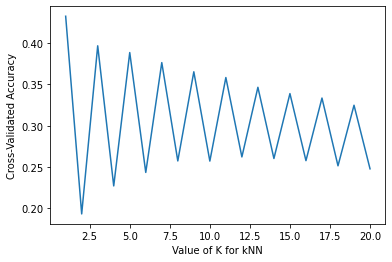

In [15]:
grid_mean_scores = [result for result in grid.cv_results_['mean_test_score']]
print(grid_mean_scores)
_ = plt.plot(k_range, grid_mean_scores)
_ = plt.xlabel('Value of K for kNN')
_ = plt.ylabel('Cross-Validated Accuracy')
plt.show()


In [16]:
# Single best score achieved across all params (k).
print(grid.best_score_)
grid_score = grid.best_score_

# Dictionary containing the parameters (k) used to generate that score.
print(grid.best_params_)

# Actual model object fit with those best parameters.
# Shows default parameters that we did not specify.
print(grid.best_estimator_)




0.4327592788971367
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


In [17]:
model_final

,metrics,values,model
0,accuracy,0.546,kNN_k


In [18]:
model_final = model_final.append({'metrics' : "accuracy" , 
                                  'values' : round(grid_score, 4),
                                  'model':'kNN_GridSearchCV' } , 
                                  ignore_index = True)
print(model_final)




    metrics  values             model
0  accuracy  0.5460             kNN_k
1  accuracy  0.4328  kNN_GridSearchCV


/var/folders/bx/98s7l1y96p1f_2n55v3g_3dc0000gn/T/ipykernel_29433/3161759597.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_final = model_final.append({'metrics' : "accuracy" ,


In [20]:
kNN_best = grid.best_estimator_

# Check accuracy of our model on the test data.
print(kNN_best.score(X_test, y_test))
kNN_champ = kNN_best.score(X_test, y_test)

model_final = model_final.append({'metrics' : "accuracy" , 
                                  'values' : round(kNN_champ, 4),
                                  'model':'kNN_optimized' },
                                ignore_index = True)
print(model_final)





1.0
    metrics  values             model
0  accuracy  0.5460             kNN_k
1  accuracy  0.4328  kNN_GridSearchCV
2  accuracy  1.0000     kNN_optimized


/var/folders/bx/98s7l1y96p1f_2n55v3g_3dc0000gn/T/ipykernel_29433/2094344796.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_final = model_final.append({'metrics' : "accuracy" ,


In [21]:
X_train, X_test, y_train, y_test,y,X,df_subset = prep_data(df,subset_columns,'percent_change','logistic')

False    7218
True     5742
Name: response, dtype: int64


/var/folders/bx/98s7l1y96p1f_2n55v3g_3dc0000gn/T/ipykernel_29433/2953734480.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['response'] = np.where(df_subset.copy()[target_col] > 0,sell,buy)


In [22]:
logistic_regression_model = linear_model.LogisticRegression()
logistic_regression_model.fit(X_train, 
                              y_train)

predicted_values = logistic_regression_model.predict(X_test)

conf_matrix_test = metrics.confusion_matrix(y_test, predicted_values)
print(conf_matrix_test)
# Compute test model accuracy score.
test_accuracy_score = metrics.accuracy_score(y_test, predicted_values)
print("Accuracy on test data: ", test_accuracy_score)

[[2106   25]
 [1650  107]]
Accuracy on test data:  0.5691872427983539


In [23]:
# Create a list of target names to interpret class assignments.
target_names = df_subset['response'].unique()
target_names=target_names.tolist()
target_names = [str(x) for x in target_names]
# Print an entire classification report.
class_report = metrics.classification_report(y_test, 
                                             predicted_values, 
                                             target_names = target_names)
print(class_report)

model_final = model_final.append({'metrics' : "accuracy" , 
                'values' : round(test_accuracy_score,4),
                'model':'logistic' },ignore_index = True)
print(model_final)

              precision    recall  f1-score   support

       False       0.56      0.99      0.72      2131
        True       0.81      0.06      0.11      1757

    accuracy                           0.57      3888
   macro avg       0.69      0.52      0.41      3888
weighted avg       0.67      0.57      0.44      3888

    metrics  values             model
0  accuracy  0.5460             kNN_k
1  accuracy  0.4328  kNN_GridSearchCV
2  accuracy  1.0000     kNN_optimized
3  accuracy  0.5692          logistic


/var/folders/bx/98s7l1y96p1f_2n55v3g_3dc0000gn/T/ipykernel_29433/3825435482.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_final = model_final.append({'metrics' : "accuracy" ,


In [25]:
# Get probabilities instead of predicted values.
test_probabilities = logistic_regression_model.predict_proba(X_test)
print(test_probabilities[0:5, :])
# Get probabilities of test predictions only.
test_predictions = test_probabilities[:, 1]
print(test_predictions[0:5])


[[0.57087599 0.42912401]
 [0.56820389 0.43179611]
 [0.58016012 0.41983988]
 [0.57133924 0.42866076]
 [0.54279823 0.45720177]]
[0.42912401 0.43179611 0.41983988 0.42866076 0.45720177]


In [26]:
fpr, tpr, threshold = metrics.roc_curve(y_test,            #<- test data labels
                                        test_predictions)  #<- predicted probabilities
print("False positive: ", fpr[:5])
print("True positive: ", tpr[:5])
print("Threshold: ", threshold[:5])

auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve: ", auc)

False positive:  [0.         0.         0.         0.00046926 0.00046926]
True positive:  [0.         0.00056915 0.00569152 0.00569152 0.00739898]
Threshold:  [1.69567455 0.69567455 0.60678689 0.60454815 0.58649621]
Area under the ROC curve:  0.7741764723635457


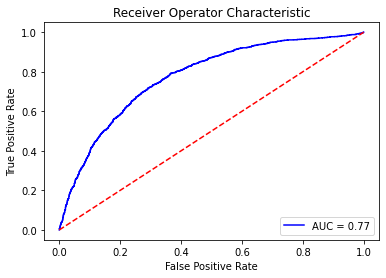

In [27]:
# Make an ROC curve plot.
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [28]:
trained_accuracy_score = logistic_regression_model.score(X_train, y_train)
print("Accuracy on train data: " , trained_accuracy_score)

# Create regularization penalty space.
penalty = ['l1', 'l2']
# Create regularization constant space.
C = np.logspace(0, 10, 10)
print("Regularization constant: ", C)
# Create hyperparameter options dictionary.
hyperparameters = dict(C = C, penalty = penalty)
print(hyperparameters)


clf = GridSearchCV(linear_model.LogisticRegression(solver='saga',
                                                   max_iter = 10000),
                                                   #,n_jobs = -1), #<- function to optimize
                   hyperparameters,                   #<- grid search parameters
                   cv = 25,                           #<- 10-fold cv
                   verbose = 2)                       #<- no messages to show
# Fit CV grid search.
best_model = clf.fit(X_train, y_train)
best_model


Accuracy on train data:  0.5832231040564374
Regularization constant:  [1.00000000e+00 1.29154967e+01 1.66810054e+02 2.15443469e+03
 2.78255940e+04 3.59381366e+05 4.64158883e+06 5.99484250e+07
 7.74263683e+08 1.00000000e+10]
{'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]), 'penalty': ['l1', 'l2']}
Fitting 25 folds for each of 20 candidates, totalling 500 fits
[CV] END ..................................C=1.0, penalty=l1; total time=   3.5s
[CV] END ..................................C=1.0, penalty=l1; total time=   3.9s
[CV] END ..................................C=1.0, penalty=l1; total time=   4.4s
[CV] END ..................................C=1.0, penalty=l1; total time=   3.8s
[CV] END ..................................C=1.0, penalty=l1; total time=   5.1s
[CV] END ..................................C=1.0, penalty=l1; total time=   3.7s
[CV] END ....

GridSearchCV(cv=25, estimator=LogisticRegression(max_iter=10000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]),
                         'penalty': ['l1', 'l2']},
             verbose=2)

In [29]:
penalty = best_model.best_estimator_.get_params()['penalty']
constant = best_model.best_estimator_.get_params()['C']
print('Best penalty: ', penalty)
print('Best C: ', constant)

best_predicted_values = best_model.predict(X_test)
print(best_predicted_values)
# Compute best model accuracy score.
best_accuracy_score = metrics.accuracy_score(y_test, best_predicted_values)
print("Accuracy on test data (best model): ", best_accuracy_score)


trained_accuracy_score = best_model.score(X_train, y_train)
print("Accuracy on train data: " , trained_accuracy_score)

Best penalty:  l1
Best C:  2154.4346900318847
[ True False False ...  True  True  True]
Accuracy on test data (best model):  0.989454732510288
Accuracy on train data:  0.9926146384479718


In [30]:
# Compute confusion matrix for best model.
best_confusion_matrix = metrics.confusion_matrix(y_test, best_predicted_values)
print(best_confusion_matrix)
# Create a list of target names to interpret class assignments.
target_names = ['Buy', 'Sell']
# Compute classification report for best model.
best_class_report = metrics.classification_report(y_test, best_predicted_values, 
                                                  target_names = target_names)
print(best_class_report)


[[2126    5]
 [  36 1721]]
              precision    recall  f1-score   support

         Buy       0.98      1.00      0.99      2131
        Sell       1.00      0.98      0.99      1757

    accuracy                           0.99      3888
   macro avg       0.99      0.99      0.99      3888
weighted avg       0.99      0.99      0.99      3888



In [31]:
model_final = model_final.append({'metrics' : "accuracy", 
                                  'values' : round(best_accuracy_score, 4),
                                  'model':'logistic_tuned' },ignore_index = True)
print(model_final)


    metrics  values             model
0  accuracy  0.5460             kNN_k
1  accuracy  0.4328  kNN_GridSearchCV
2  accuracy  1.0000     kNN_optimized
3  accuracy  0.5692          logistic
4  accuracy  0.9895    logistic_tuned


/var/folders/bx/98s7l1y96p1f_2n55v3g_3dc0000gn/T/ipykernel_29433/747231987.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_final = model_final.append({'metrics' : "accuracy",


In [32]:
# Get probabilities instead of predicted values.
best_test_probabilities = best_model.predict_proba(X_test)
print(best_test_probabilities[0:5, ])
# Get probabilities of test predictions only.
best_test_predictions = best_test_probabilities[:, 1]
print(best_test_predictions[0:5])


best_fpr, best_tpr, best_threshold = metrics.roc_curve(y_test, best_test_predictions)
best_auc = metrics.auc(best_fpr, best_tpr)
print(best_auc)

[[4.43124462e-02 9.55687554e-01]
 [9.69926943e-01 3.00730573e-02]
 [9.99728403e-01 2.71597227e-04]
 [9.99777219e-01 2.22780576e-04]
 [6.86151723e-05 9.99931385e-01]]
[9.55687554e-01 3.00730573e-02 2.71597227e-04 2.22780576e-04
 9.99931385e-01]
0.9997729802116198


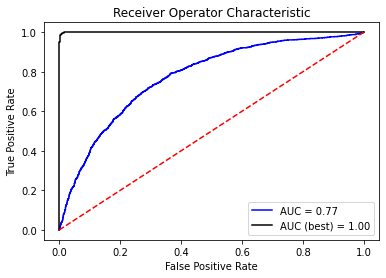

In [33]:
# Make an ROC curve plot.
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'blue', 
         label = 'AUC = %0.2f'%auc)
plt.plot(best_fpr, best_tpr, 'black', 
         label = 'AUC (best) = %0.2f'%best_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

trained_accuracy_score = logistic_regression_model.score(X_train, y_train)
print("Accuracy on train data: " , trained_accuracy_score)

# Create regularization penalty space.
penalty = ['l1', 'l2']
# Create regularization constant space.
C = np.logspace(0, 10, 10)
print("Regularization constant: ", C)
# Create hyperparameter options dictionary.
hyperparameters = dict(C = C, penalty = penalty)
print(hyperparameters)


clf = GridSearchCV(linear_model.LogisticRegression(solver='saga',
                                                   max_iter = 5000),
                                                   #,n_jobs = -1), #<- function to optimize
                   hyperparameters,                   #<- grid search parameters
                   cv = 25,                           #<- 10-fold cv
                   verbose = 1)                       #<- no messages to show
# Fit CV grid search.
best_model = clf.fit(X_train, y_train)
best_model


## Decision Tree

In [34]:
X_train, X_test, y_train, y_test,y,X,df_subset = prep_data(df,subset_columns,'percent_change','dt')

False    7218
True     5742
Name: response, dtype: int64


/var/folders/bx/98s7l1y96p1f_2n55v3g_3dc0000gn/T/ipykernel_29433/2953734480.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['response'] = np.where(df_subset.copy()[target_col] > 0,sell,buy)


In [35]:
clf = tree.DecisionTreeClassifier()
clf_fit = clf.fit(X_train, y_train)

# Predict on X_test.
y_predict = clf_fit.predict(X_test)
y_predict[:20]

array([False, False, False,  True,  True, False, False,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
       False, False])

In [36]:
# Confusion matrix for first model.
cm_tree = confusion_matrix(y_test,y_predict)
# Accuracy score.
acc_score = accuracy_score(y_test, y_predict)
print(acc_score)

0.7150205761316872


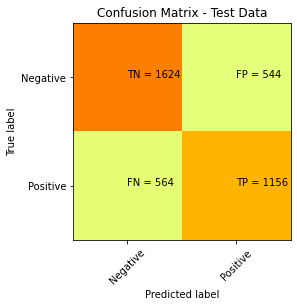

In [37]:
plt.clf()
plt.imshow(cm_tree, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm_tree[i][j]))
plt.show()


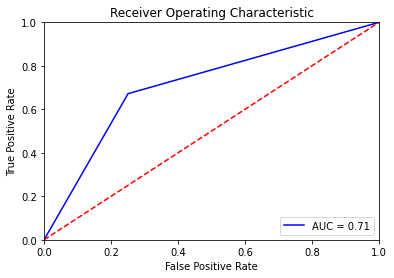

In [38]:
# Calculate metrics for ROC (fpr, tpr) and calculate AUC.
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC.
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [39]:
clf = tree.DecisionTreeClassifier()
print(clf)
clf_fit = clf.fit(X_train, y_train)
y_predict = clf_fit.predict(X_test)
print(y_predict[:20])
tree_accuracy_score = metrics.accuracy_score(y_test, y_predict)
print("Accuracy on test data: ", tree_accuracy_score)

DecisionTreeClassifier()
[False False  True  True  True False False  True False  True False False
  True False  True  True  True  True False False]
Accuracy on test data:  0.7157921810699589


In [40]:
acc_train_tree = clf_fit.score(X_train,
                                 y_train)
print ("Train Accuracy:", acc_train_tree)

Train Accuracy: 1.0


In [43]:
model_final = model_final.append({'metrics' : "accuracy" , 
                                  'values' : round(tree_accuracy_score,4),
                                  'model':'tree_all_variables' },ignore_index = True)
print(model_final)


    metrics  values               model
0  accuracy  0.5460               kNN_k
1  accuracy  0.4328    kNN_GridSearchCV
2  accuracy  1.0000       kNN_optimized
3  accuracy  0.5692            logistic
4  accuracy  0.9895      logistic_tuned
5  accuracy  0.7158  tree_all_variables
6  accuracy  0.7158  tree_all_variables


/var/folders/bx/98s7l1y96p1f_2n55v3g_3dc0000gn/T/ipykernel_29433/3823576582.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_final = model_final.append({'metrics' : "accuracy" ,


In [44]:
clf = tree.DecisionTreeClassifier()
cv_scores = cross_val_score(clf, X, y, cv = 10)
# Print each cv score (accuracy) and average them.
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
mean = np.mean(cv_scores)
print("Optimal cv score is:", round(mean, 4))


[0.82638889 0.75       0.74845679 0.82253086 0.73070988 0.74459877
 0.77314815 0.82253086 0.49151235 0.7662037 ]
cv_scores mean:0.7476080246913581
Optimal cv score is: 0.7476


In [45]:
def optimal_parameter(values,test_results):
    best_test_value = max(test_results)
    best_test_index = test_results.index(best_test_value)
    best_value = values[best_test_index]
    return(best_value)


In [46]:
# Max depth:
max_depths = np.linspace(1, 128, 32, endpoint = True)
train_results = []
test_results = []

for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth = int(max_depth))
   dt.fit(X_train, y_train)
   
   train_pred = dt.predict(X_train)
   acc_train = accuracy_score(y_train, train_pred)
   
   # Add accuracy score to previous train results
   train_results.append(acc_train)
   y_pred = dt.predict(X_test)
   acc_test = accuracy_score(y_test, y_pred)
   # Add accuracy score to previous test results
   test_results.append(acc_test)
# Store optimal max_depth.
optimal_max_depth = optimal_parameter(max_depths,test_results)  


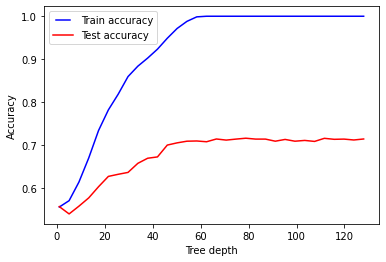

In [47]:
# Plot max depth over 1 - 32. 
line1, = plt.plot(max_depths, train_results, 'b', label= "Train accuracy")
line2, = plt.plot(max_depths, test_results, 'r', label= "Test accuracy")

plt.legend(handler_map={line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

In [48]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   acc_train = accuracy_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(acc_train)
   y_pred = dt.predict(X_test)
   acc_test = accuracy_score(y_test, y_pred)
   # Add accuracy score to previous test results
   test_results.append(acc_test)
# Store optimal max_depth.
optimal_min_samples_split = optimal_parameter(min_samples_splits,test_results) 


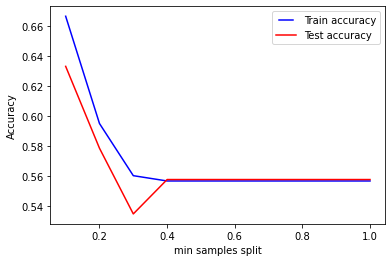

In [49]:
line1, = plt.plot(min_samples_splits, train_results, 'b', label = "Train accuracy")
line2, = plt.plot(min_samples_splits, test_results, 'r', label = "Test accuracy")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('min samples split')
plt.show()


In [50]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint = True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   acc_train = accuracy_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(acc_train)
   y_pred = dt.predict(X_test)
   acc_test = accuracy_score(y_test, y_pred)
   # Add accuracy score to previous test results
   test_results.append(acc_test)
optimal_min_samples_leafs = optimal_parameter(min_samples_leafs,test_results)

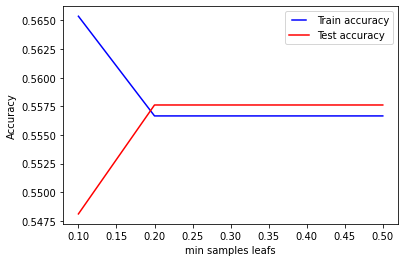

In [51]:
line1, = plt.plot(min_samples_leafs, train_results, 'b', label= "Train accuracy")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label= "Test accuracy")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('min samples leafs')
plt.show()

In [52]:
max_features = list(range(1,X.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
   dt = DecisionTreeClassifier(max_features=max_feature)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   acc_train = accuracy_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(acc_train)
   y_pred = dt.predict(X_test)
   acc_test = accuracy_score(y_test, y_pred)
   
   # Add accuracy score to previous test results
   test_results.append(acc_test)
optimal_max_features = optimal_parameter(max_features,test_results) 



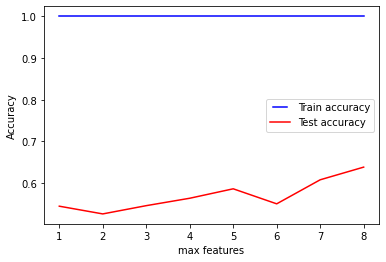

In [53]:
line1, = plt.plot(max_features, train_results, 'b', label= "Train accuracy")
line2, = plt.plot(max_features, test_results, 'r', label= "Test accuracy")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('max features')
plt.show()

In [54]:
print("The optimal max depth is:", optimal_max_depth)
print("The optimal min samples split is:", optimal_min_samples_split)
print("The optimal min samples leaf is:", optimal_min_samples_leafs)
print("The optimal max features is:", optimal_max_features)

The optimal max depth is: 78.83870967741936
The optimal min samples split is: 0.1
The optimal min samples leaf is: 0.2
The optimal max features is: 8


In [55]:
clf_optimized = tree.DecisionTreeClassifier(max_depth = int(optimal_max_depth),
                                            min_samples_split = optimal_min_samples_split,
                                            min_samples_leaf = optimal_min_samples_leafs,
                                            max_features = optimal_max_features)
                                            
# We can now see our optimized features where before they were just default:
print(clf_optimized)
clf_optimized_fit = clf_optimized.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=78, max_features=8, min_samples_leaf=0.2,
                       min_samples_split=0.1)


In [56]:
# Predict on X_test.
y_predict_optimized = clf_optimized_fit.predict(X_test)

# Get the accuracy score.
acc_score_tree_optimized = accuracy_score(y_test, y_predict_optimized)

print(acc_score_tree_optimized)


0.5576131687242798


In [57]:
# Compute accuracy using training data.
acc_train_tree_optimized = clf_optimized_fit.score(X_train,
                                         y_train)
                                         
print ("Train Accuracy:", acc_train_tree_optimized)

Train Accuracy: 0.556657848324515


In [58]:
# Add the optimized model to our dataframe.
model_final= model_final.append({'metrics' : "accuracy" , 
             'values' : round(acc_score_tree_optimized,4),
             'model':'tree_all_variables_optimized' },ignore_index = True)
print(model_final)

    metrics  values                         model
0  accuracy  0.5460                         kNN_k
1  accuracy  0.4328              kNN_GridSearchCV
2  accuracy  1.0000                 kNN_optimized
3  accuracy  0.5692                      logistic
4  accuracy  0.9895                logistic_tuned
5  accuracy  0.7158            tree_all_variables
6  accuracy  0.7158            tree_all_variables
7  accuracy  0.5576  tree_all_variables_optimized


/var/folders/bx/98s7l1y96p1f_2n55v3g_3dc0000gn/T/ipykernel_29433/4066245093.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_final= model_final.append({'metrics' : "accuracy" ,


In [67]:
model_final

,metrics,values,model
0,accuracy,0.5460,kNN_k
1,accuracy,0.4328,kNN_GridSearchCV
2,accuracy,1.0000,kNN_optimized
3,accuracy,0.5692,logistic
4,accuracy,0.9895,logistic_tuned
5,accuracy,0.7158,tree_all_variables
6,accuracy,0.5576,tree_all_variables_optimized
